In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv("titanic_train.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

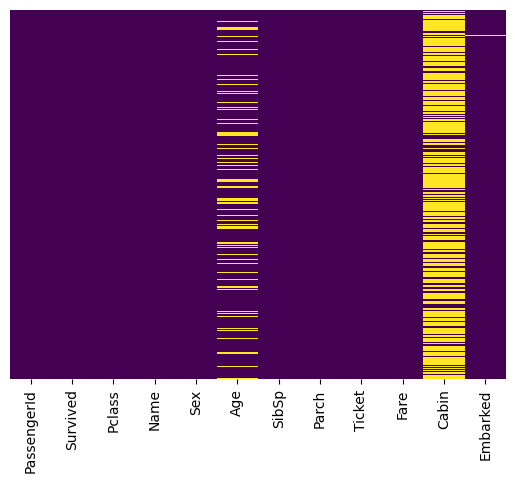

In [6]:
sns.heatmap(train.isnull(), yticklabels = False,cbar = False,cmap = 'viridis' )

<Axes: xlabel='Survived', ylabel='count'>

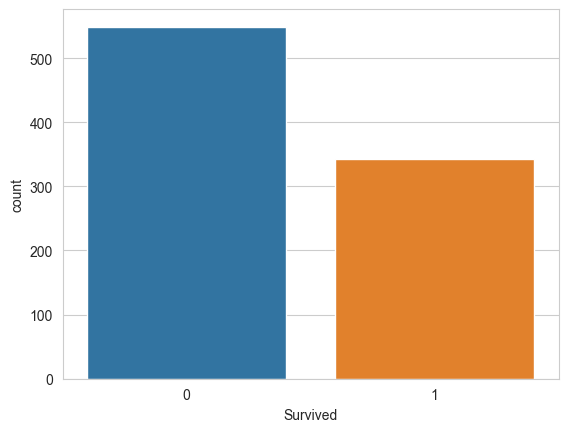

In [7]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", data = train)

<Axes: xlabel='Survived', ylabel='count'>

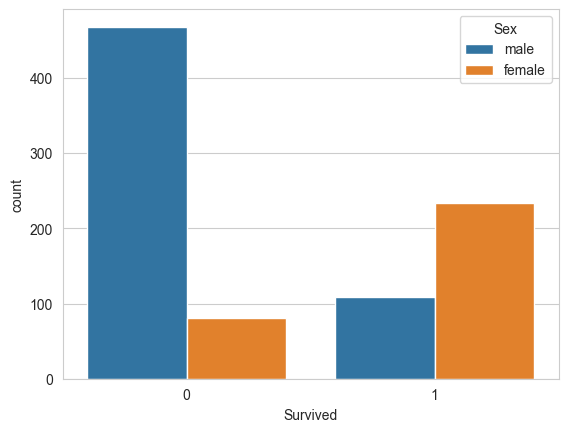

In [8]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", hue="Sex", data = train)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23760\3238756970.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(), kde=False, color='darkred', bins=40)


<Axes: xlabel='Age'>

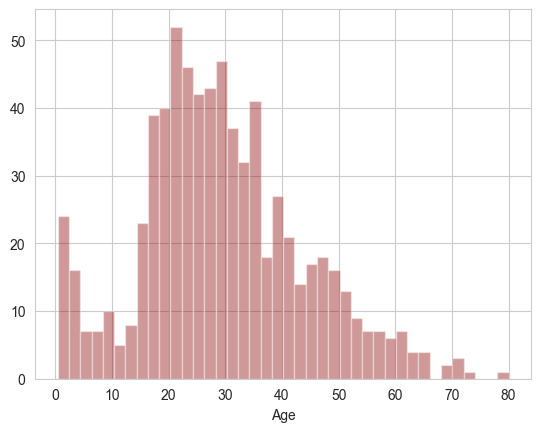

In [9]:
sns.distplot(train['Age'].dropna(), kde=False, color='darkred', bins=40)

<Axes: xlabel='SibSp', ylabel='count'>

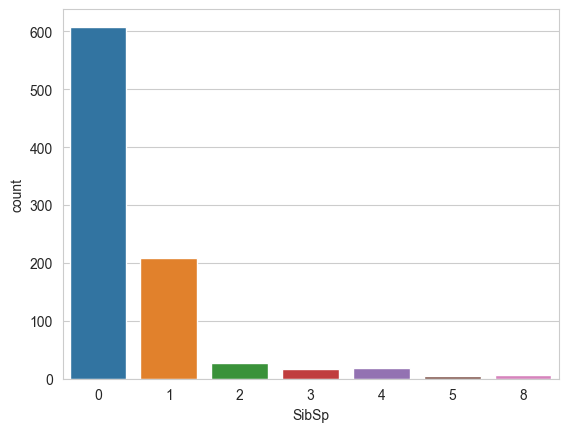

In [10]:
sns.countplot(x='SibSp', data=train)

<Axes: >

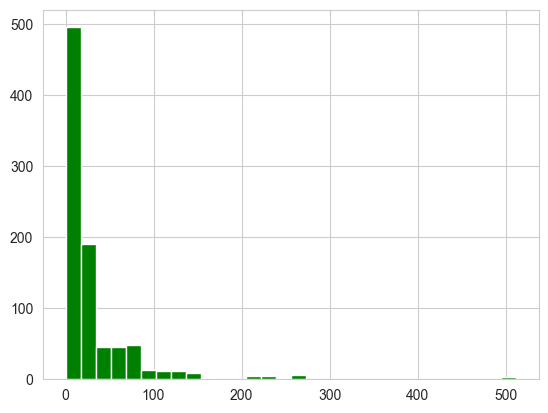

In [11]:
train['Fare'].hist(color='green', bins=30)

<Axes: xlabel='Pclass', ylabel='Age'>

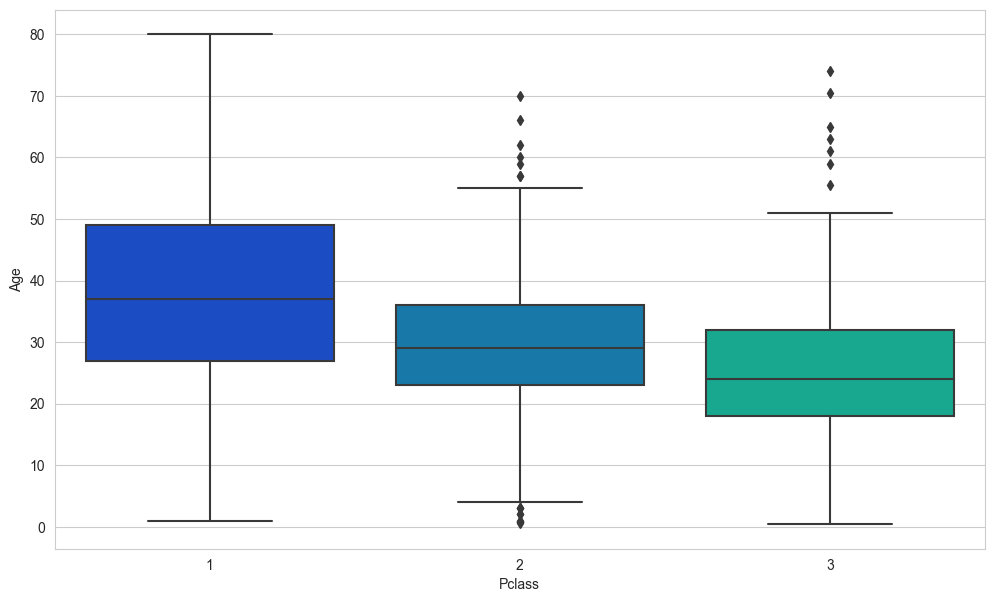

In [12]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age', data=train, palette='winter')

In [13]:
def input_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if(pd.isnull(Age)):
        if Pclass==1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
        
    else:
        return Age
    


In [14]:
train['Age'] = train[['Age','Pclass']].apply(input_age, axis = 1)


<Axes: >

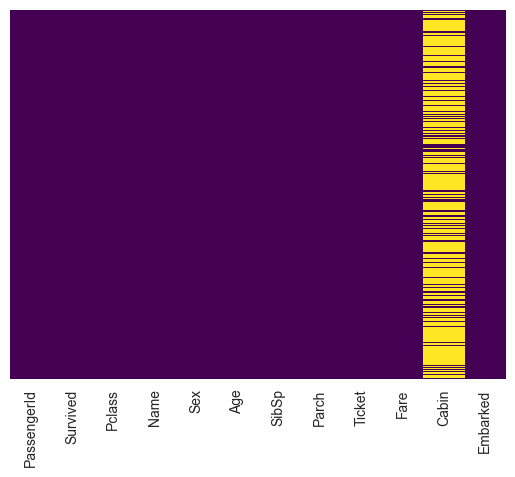

In [15]:
sns.heatmap(train.isnull(), yticklabels = False,cbar = False,cmap = 'viridis' )


In [16]:
train.drop('Cabin', axis = 1, inplace=True)


In [17]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [19]:
pd.get_dummies(train['Embarked'], drop_first=True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [20]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [21]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1, inplace=True)


In [22]:
train = pd.concat([train, sex, embark], axis =1)


In [23]:
train.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [24]:
def even(num):
    if(num%2 ==0):
        return True
    return False

In [25]:
lst =[1,2,3,4,5,6]

list(filter(even,lst))


[2, 4, 6]

In [26]:
list(filter(lambda num:num%2==0,lst)) # we get the same output

[2, 4, 6]

In [27]:
lst1=[]
def lst_square(lst):
    for i in lst:
        lst1.append(i*i)
        
    return lst1


lst_square([1,2,3,4,5,6,7,8])
print(lst1)

[1, 4, 9, 16, 25, 36, 49, 64]


In [28]:
#code for lst comprehension

lst = [1,2,3,4,5]

[i*i for i in lst]

# - better for saving time and save variables

[1, 4, 9, 16, 25]

In [29]:
lst1= [i*i for i in lst if i%2==0]


In [30]:
print(lst1)


[4, 16]
